In [1]:
import sys 
sys.path.append('../../')  
from main import device_process_measurement_tomography, Quantities, Cross_Quantities, results2quantities
import QuantumTomography as qt 
import matplotlib.pyplot as plt 
import numpy as np 
from qiskit import QuantumCircuit, Aer, IBMQ 
from qiskit.compiler import transpile 
import json 
from qiskit.result import Result 
from qiskit.test.mock import FakeCasablanca 
from utils_qiskit import * 
from utils_plots import *
from qiskit.providers.ibmq.managed import IBMQJobManager

In [2]:
jobs = [ '00d3107d150c4856bb145bc3fca2f147-16647947252239227',
            '7ce83169d75d4115a8dd2e839692d898-16655968534771705',
            '5373eb205b0e40f180632c1e0774aae4-1666877735257145',
            '04bb65c3638d4ee2bcb2039cf79f24fc-1666877752352261',
            'fce7c304165046509024a820e01ed340-16668777693586967' ]

In [3]:
choi_single = []
povm_single = []
choi_double = []
povm_double = []

quantities_single = []
quantities_double = []
correlations      = []
errores           = []
fit_single        = [] 
fit_double        = [] 
pairs = [ [(1,3),(4,5)], [ (3,5),(0,1) ], [(1,2),(5,6)]    ]

for job in jobs:

    results_tomography = np.load( 'data_tomo_'+job+'.npy', allow_pickle=True ).all()

    results_single     = results_tomography.single                             
    results_double     = results_tomography.double                            
    results_gateset    = results_tomography.gateset   

    choi_single.append( results_single.chois )
    povm_single.append( results_single.povms )
    choi_double.append( [ results_double[j].chois for j in range(3)] )
    povm_double.append( [ results_double[j].povms for j in range(3)] )
    fit_single.append( [ np.array(idx)[:,2] for idx in results_tomography.single.funs ] )
    fit_double.append( [ np.array(idx)[:,2] for results in results_tomography.double for idx in results.funs ] ) 

    f0, f1, fc, fd = results_tomography.all_quantities(pairs)

    quantities_single.append( f0 )
    quantities_double.append( f1 )
    correlations.append( fc )
    errores.append( fd )

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


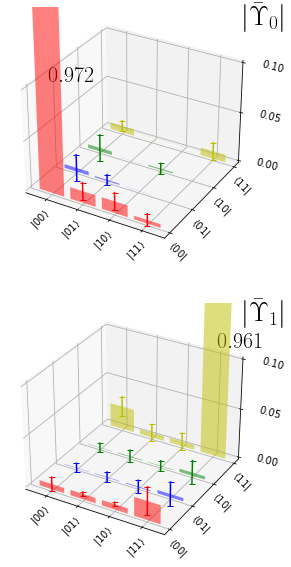

In [17]:
choi_single_mean = np.mean(choi_single, axis=(0,1))
choi_single_std = np.std(choi_single,axis=(0,1))

pos_label = [3.2, 4, 0.12]
Labels = [ r'$|\bar\Upsilon_0|$', r'$|\bar\Upsilon_1|$'  ]
pos_ticks = [0,1,2,3]
x_ticks = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$']
y_ticks = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

axes = Plot_Chois( choi_single_mean , error_choi=choi_single_std, shape=(2,1) )
set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_mean_single.png', bbox_inches='tight', transparent=True )
plt.savefig('choi_mean_single.svg', bbox_inches='tight', transparent=True ) 

In [18]:
abs(choi_single_mean[0]), abs(choi_single_mean[1])

(array([[9.71893798e-01, 3.79919607e-03, 3.79919607e-03, 6.94656441e-03],
        [1.18696407e-02, 1.26847458e-03, 1.47848982e-04, 1.50377084e-04],
        [1.18696407e-02, 1.47848982e-04, 1.26847458e-03, 1.50377084e-04],
        [3.58982926e-03, 3.29218585e-05, 3.29218585e-05, 7.97778849e-03]]),
 array([[5.38339726e-03, 4.29767452e-04, 4.29767452e-04, 2.39681199e-02],
        [5.53123480e-03, 5.37286793e-04, 7.99844488e-04, 5.04069028e-03],
        [5.53123480e-03, 7.99844488e-04, 5.37286793e-04, 5.04069028e-03],
        [1.91341978e-02, 3.37861244e-03, 3.37861244e-03, 9.61106305e-01]]))

In [19]:
1-np.exp(-700/100000),  0.007*100/0.02

(0.0069755570667648925, 35.0)

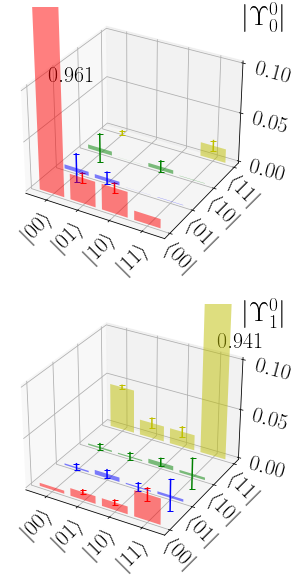

In [20]:
choi_single_mc_mean = np.mean(choi_single,axis=0)
choi_single_mc_std = np.std(choi_single,axis=0)

pos_label = [3.2, 4, 0.12]
Labels = [ r'$|\Upsilon_0^0|$', r'$|\Upsilon_1^0|$'  ]
pos_ticks = [0,1,2,3]
x_ticks = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$']
y_ticks = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

axes = Plot_Chois( choi_single_mc_mean[0], choi_single_mc_std[0], shape=(2,1)  )
set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_single_worst.png', bbox_inches='tight', transparent=True )
plt.savefig('choi_single_worst.svg', bbox_inches='tight', transparent=True )

In [21]:
abs( choi_single_mc_mean[0][0] ), abs( choi_single_mc_mean[0][1] )

(array([[9.61070523e-01, 4.21373028e-03, 4.21373028e-03, 5.13878262e-05],
        [2.60099748e-02, 3.83739157e-03, 9.55694309e-05, 4.76457453e-05],
        [2.60099748e-02, 9.55694309e-05, 3.83739157e-03, 4.76457453e-05],
        [9.35363286e-03, 3.34573523e-04, 3.34573523e-04, 1.42429980e-02]]),
 array([[0.00317185, 0.00157962, 0.00157962, 0.04498383],
        [0.00787777, 0.00458919, 0.00122946, 0.01594893],
        [0.00787777, 0.00122946, 0.00458919, 0.01594893],
        [0.0264083 , 0.00263005, 0.00263005, 0.94071747]]))

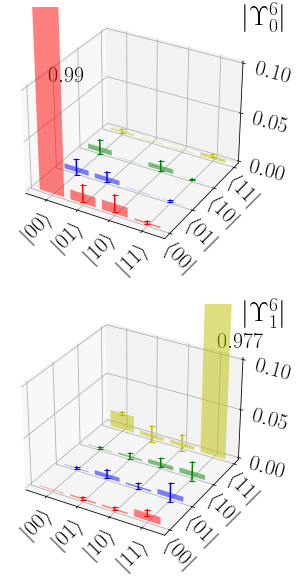

In [22]:

pos_label = [3.2, 4, 0.12]
Labels = [ r'$|\Upsilon_0^6|$', r'$|\Upsilon_1^6|$'  ]
pos_ticks = [0,1,2,3]
x_ticks = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$',r'$|11\rangle$']
y_ticks = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

axes = Plot_Chois( choi_single_mc_mean[6], choi_single_mc_std[6], shape=(2,1) )
set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_single_best.png', bbox_inches='tight', transparent=True )
plt.savefig('choi_single_best.svg', bbox_inches='tight', transparent=True )

In [23]:
choi_single_mc_mean[6][0], choi_single_mc_mean[6][1]

(array([[ 9.90106684e-01+0.j        , -3.22309467e-03+0.00420916j,
         -3.22309467e-03-0.00420916j,  1.93459033e-03+0.j        ],
        [ 5.80032476e-03-0.00826267j, -3.20153319e-03-0.00359393j,
          2.50912409e-04-0.00024187j, -4.48889745e-04-0.00049161j],
        [ 5.80032476e-03+0.00826267j,  2.50912409e-04+0.00024187j,
         -3.20153319e-03+0.00359393j, -4.48889745e-04+0.00049161j],
        [ 1.65021539e-03+0.j        ,  6.39669764e-05+0.00021002j,
          6.39669764e-05-0.00021002j,  3.64092550e-03+0.j        ]]),
 array([[ 6.23973795e-04+0.j        , -2.96764119e-04-0.00056266j,
         -2.96764119e-04+0.00056266j,  1.72492206e-02+0.j        ],
        [-1.02853060e-03-0.00117772j,  1.53752679e-03-0.00410308j,
          1.65377911e-03-0.00034313j,  9.08603635e-04+0.00398921j],
        [-1.02853060e-03+0.00117772j,  1.65377911e-03+0.00034313j,
          1.53752679e-03+0.00410308j,  9.08603635e-04-0.00398921j],
        [ 7.61860959e-03+0.j        ,  3.45586126e-03

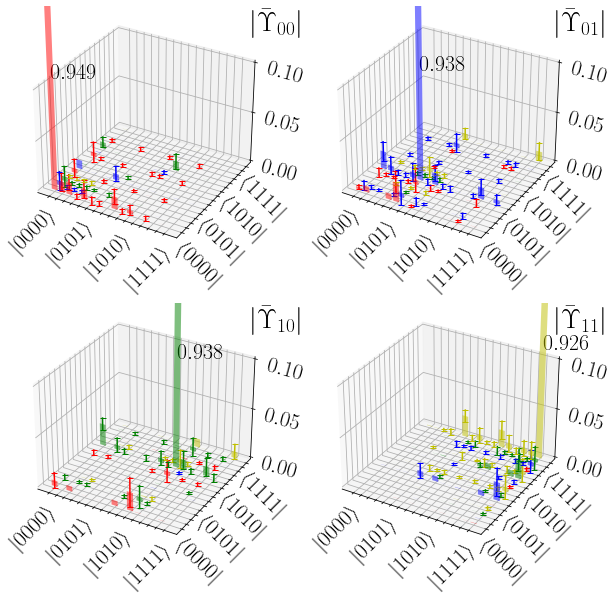

In [24]:
choi_double_mean = np.mean( choi_double, axis=(0,1,2) )
choi_double_std = np.std( choi_double, axis=(0,1,2) )

pos_label = [16., 16, 0.13]
Labels = [ r'$|\bar\Upsilon_{00}|$', r'$|\bar\Upsilon_{01}|$', r'$|\bar\Upsilon_{10}|$', r'$|\bar\Upsilon_{11}|$' ]
pos_ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
x_ticks = [r'$|0000\rangle$', '', '', '', '', r'$|0101\rangle$', '', '', '', '',
             r'$|1010\rangle$', '', '', '', '', r'$|1111\rangle$']
y_ticks = [r'$\langle 0000|$', '', '', '', '', r'$\langle 0101|$', 
            '', '', '', '', r'$\langle 1010|$', '', '', '', '', r'$\langle 1111|$']
axes = Plot_Chois( choi_double_mean, choi_double_std, shape=(2,2) )
axes = set_ticks( axes, pos_ticks, x_ticks, pos_ticks, y_ticks, pos_label, Labels )
plt.savefig('choi_double_mean_grid.png', bbox_inches='tight', transparent=True )
plt.savefig('choi_double_mean_grid.svg', bbox_inches='tight', transparent=True )


In [25]:
np.sort( abs(choi_double_mean)[3].flatten() )

array([2.51041058e-08, 2.51041058e-08, 5.00286878e-07, 5.00286878e-07,
       8.64907109e-07, 8.64907109e-07, 1.09893289e-06, 1.09893289e-06,
       1.26174024e-06, 1.26174024e-06, 1.35285816e-06, 1.35285816e-06,
       2.28543782e-06, 2.28543782e-06, 3.43610116e-06, 3.43610116e-06,
       4.33689646e-06, 4.33689646e-06, 4.38987403e-06, 4.38987403e-06,
       4.52155579e-06, 4.52155579e-06, 4.98619178e-06, 4.98619178e-06,
       5.17360002e-06, 5.17360002e-06, 5.82802318e-06, 5.82802318e-06,
       5.93176593e-06, 5.93176593e-06, 6.10742029e-06, 6.10742029e-06,
       6.74304878e-06, 6.74304878e-06, 7.68610252e-06, 7.89477235e-06,
       7.89477235e-06, 8.22477219e-06, 8.22477219e-06, 9.14634285e-06,
       9.14634285e-06, 1.04805689e-05, 1.04805689e-05, 1.07568694e-05,
       1.07568694e-05, 1.12789810e-05, 1.12789810e-05, 1.12992288e-05,
       1.12992288e-05, 1.20213222e-05, 1.20213222e-05, 1.20725932e-05,
       1.20725932e-05, 1.36337118e-05, 1.36337118e-05, 1.44889741e-05,
      

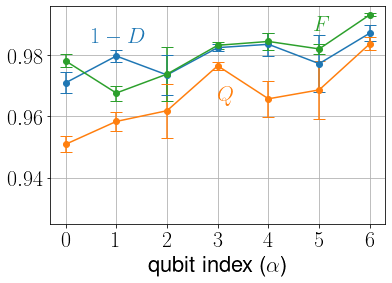

In [26]:
quantities_single_mean = np.mean(quantities_single,axis=0)
quantities_single_std = np.std(quantities_single,axis=0)


for j in [2,1,0]:
    plt.errorbar( range(7), quantities_single_mean[:,j], quantities_single_std[:,j], capsize=6,  fmt='-o' )
plt.grid()
plt.xlabel('qubit index ($\\alpha$)')
plt.xticks([0,1,2,3,4,5,6])
plt.ylim( bottom=0.925)
plt.text( 4.9, 0.988, '$F$', color='tab:green' )
plt.text( 3, 0.965, '$Q$', color='tab:orange' )
plt.text( 0.5, 0.984, '$1-D$', color='tab:blue' )
plt.savefig('quantities_single.svg', bbox_inches='tight', transparent=True )
plt.savefig('quantities_single.png', bbox_inches='tight', transparent=True  )

In [27]:
quantities_single_mean

array([[0.97806786, 0.950894  , 0.97090367],
       [0.96759408, 0.95834147, 0.97964867],
       [0.97374929, 0.96183394, 0.97348612],
       [0.98313708, 0.97645915, 0.98237851],
       [0.98438792, 0.96571331, 0.98345899],
       [0.98195301, 0.96861726, 0.97715798],
       [0.99309726, 0.98364123, 0.98711768]])

In [28]:
import seaborn as sns
import matplotlib

def create_color_map( error_mean, vmin=0, vmax=100, **args):
    color_map = sns.cubehelix_palette( reverse=True, as_cmap=True, **args)
    colors = matplotlib.colors.Normalize( vmin=vmin, vmax=vmax )
    l_colors = [255*np.array(color_map(colors(100*err))) for err in error_mean ]
    return 255*np.array(color_map(colors(0))), 255*np.array(color_map(colors(100))), l_colors

In [29]:
np.mean(quantities_single,axis=(0,1))

array([0.98028379, 0.96650005, 0.97916452])

In [30]:
create_color_map(np.mean( quantities_single, (0,2) ), 96, 99, start=2.8, rot=.1 )

(array([ 28.80987579,  38.16447768,  62.18182783, 255.        ]),
 array([217.75517571, 211.88998467, 242.34884824, 255.        ]),
 [array([ 65.18201614,  75.30755998, 118.30862295, 255.        ]),
  array([ 76.39660495,  85.59298838, 132.55610384, 255.        ]),
  array([ 84.7606518 ,  93.05365386, 142.45605758, 255.        ]),
  array([157.65813872, 155.5164045 , 208.61731666, 255.        ]),
  array([138.54301286, 139.09759144, 194.26856126, 255.        ]),
  array([125.10210006, 127.69243143, 183.00780832, 255.        ]),
  array([205.08839129, 199.06283869, 236.60389124, 255.        ])])

In [31]:
quantities_single_mean

array([[0.97806786, 0.950894  , 0.97090367],
       [0.96759408, 0.95834147, 0.97964867],
       [0.97374929, 0.96183394, 0.97348612],
       [0.98313708, 0.97645915, 0.98237851],
       [0.98438792, 0.96571331, 0.98345899],
       [0.98195301, 0.96861726, 0.97715798],
       [0.99309726, 0.98364123, 0.98711768]])

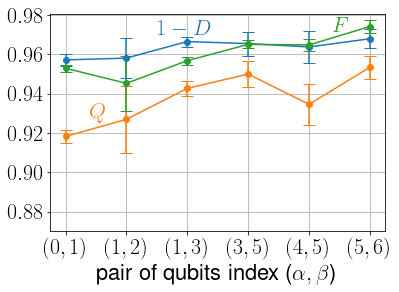

In [32]:
order_pairs = [ 3, 4, 0, 2, 1, 5 ]
quantities_double_mean = np.mean(quantities_double, axis=0)
quantities_double_std = np.std(quantities_double, axis=0)
for j in [2,1,0]:
    plt.errorbar( range(6), quantities_double_mean[order_pairs,j], quantities_double_std[order_pairs,j], capsize=6,  fmt='-o' )
plt.ylim( bottom=0.87)
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$', '$(1,2)$', '$(1,3)$', '$(3,5)$', '$(4,5)$', '$(5,6)$'] )
plt.yticks([ 0.88, 0.90, 0.92, 0.94,0.96 , 0.98 ])
plt.text( 4.4, 0.9715, '$F$', color='tab:green' )
plt.text( 0.4, 0.927, '$Q$', color='tab:orange' )
plt.text( 1.5, 0.97, '$1-D$', color='tab:blue' )
plt.grid()
plt.xlabel('pair of qubits index ($\\alpha,\\beta$)')
plt.savefig('quantities_double_mean.png', bbox_inches='tight', transparent=True )
plt.savefig('quantities_double_mean.svg', bbox_inches='tight', transparent=True )


In [33]:
quantities_double_mean

array([[0.95673147, 0.94264756, 0.96646557],
       [0.96474537, 0.93455177, 0.96371221],
       [0.96502108, 0.94991204, 0.96541906],
       [0.95286626, 0.9181947 , 0.9571168 ],
       [0.94523375, 0.92690449, 0.95805356],
       [0.9741141 , 0.95334812, 0.9678924 ]])

In [34]:
np.mean(quantities_double_mean,axis=0)

array([0.95978534, 0.93759311, 0.96310993])

In [35]:
np.mean( quantities_double, (0,2) )

array([0.95528153, 0.95433645, 0.96011739, 0.94272592, 0.94339726,
       0.96511821])

In [36]:
create_color_map(np.mean( quantities_double, (0,2) )[order_pairs], 94, 97, rot = -.4  )

(array([ 27.77491317,  38.77109381,  61.7507723 , 255.        ]),
 array([198.59433255, 228.9180809 , 203.27276485, 255.        ]),
 [array([ 36.41701527,  57.54401704,  82.9447735 , 255.        ]),
  array([ 38.4728727 ,  62.38444258,  87.73922931, 255.        ]),
  array([ 84.44995118, 148.88655626, 143.83553126, 255.        ]),
  array([115.09633091, 179.69551079, 158.64276407, 255.        ]),
  array([ 80.01312508, 143.16409232, 141.17465528, 255.        ]),
  array([154.98532324, 206.81042325, 177.14737459, 255.        ])])

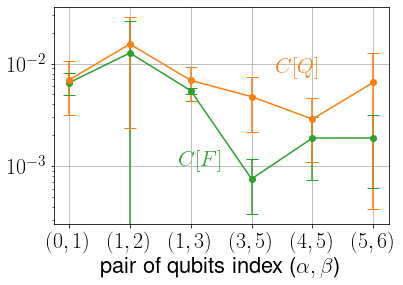

In [37]:
correlations_mean = np.mean(correlations, axis=0 )
correlations_std  = np.std(correlations, axis=0 )
errores_mean      = np.mean(errores, axis=0 )
errores_std       = np.std(errores, axis=0 )

color = [ 'tab:green', 'tab:orange', 'tab:purple', 'tab:red']

for j in [0,1]:
    plt.errorbar( range(6), errores_mean[order_pairs,j], errores_std[order_pairs,j], capsize=6,  fmt='-o', c=color[j] )
plt.yscale('log')
plt.grid()
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$', '$(1,2)$', '$(1,3)$', '$(3,5)$', '$(4,5)$', '$(5,6)$'] )
plt.text( 1.8, 1e-3, '$C[F]$', color='tab:green' )
plt.text( 3.4, 0.8e-2, '$C[Q]$', color='tab:orange' )
plt.xlabel('pair of qubits index ($\\alpha,\\beta$)')
plt.savefig('correlations_double_mean_1.png', bbox_inches='tight', transparent=True )
plt.savefig('correlations_double_mean_1.svg', bbox_inches='tight', transparent=True )


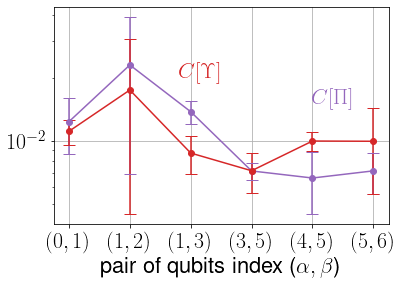

In [38]:
for j in [0,1]:
    plt.errorbar( range(6), correlations_mean[order_pairs,j], correlations_std[order_pairs,j], capsize=6,  fmt='-o', c=color[2+j] )
plt.yscale('log')
plt.grid()
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$', '$(1,2)$', '$(1,3)$', '$(3,5)$', '$(4,5)$', '$(5,6)$'] )
plt.text( 4, 1.5e-2, '$C[\\Pi]$', color='tab:purple' )
plt.text( 1.8, 2e-2, '$C[\\Upsilon]$', color='tab:red' )
plt.xlabel('pair of qubits index ($\\alpha,\\beta$)')
plt.savefig('correlations_double_mean_2.png', bbox_inches='tight', transparent=True )
plt.savefig('correlations_double_mean_2.svg', bbox_inches='tight', transparent=True )


In [49]:
correlations_mean

array([[0.01377535, 0.00874864],
       [0.0066506 , 0.0099834 ],
       [0.00718749, 0.00720323],
       [0.01235174, 0.01111025],
       [0.02302109, 0.01748445],
       [0.00719345, 0.00995662]])

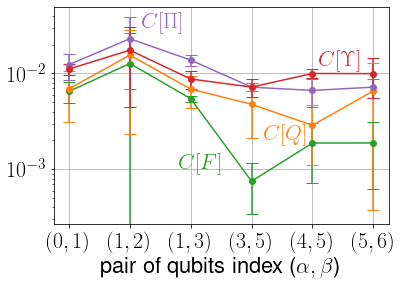

In [48]:
for j in [0,1]:
    plt.errorbar( range(6), errores_mean[order_pairs,j], errores_std[order_pairs,j], capsize=6,  fmt='-o', c=color[j] )
for j in [0,1]:
    plt.errorbar( range(6), correlations_mean[order_pairs,j], correlations_std[order_pairs,j], capsize=6,  fmt='-o', c=color[2+j] )
plt.yscale('log')
plt.grid()
plt.xticks( [0,1,2,3,4,5], ['$(0,1)$', '$(1,2)$', '$(1,3)$', '$(3,5)$', '$(4,5)$', '$(5,6)$'] )
plt.text( 1.8, 1e-3, '$C[F]$', color='tab:green' )
plt.text( 3.2, 2e-3, '$C[Q]$', color='tab:orange' )
plt.text( 1.2, 3e-2, '$C[\\Pi]$', color='tab:purple' )
plt.text( 4.1, 1.2e-2, '$C[\\Upsilon]$', color='tab:red'  )
plt.xlabel('pair of qubits index ($\\alpha,\\beta$)')
plt.savefig('correlations_double_mean_3.png', bbox_inches='tight', transparent=True )
plt.savefig('correlations_double_mean_3.svg', bbox_inches='tight', transparent=True )